# RobustScaler for Unsupervised and Supervised Models

#### Using RobustScaler to scale the data before using unsupervised and supervised learning on the data to see if it provides a better model. 

<br>

#### Use 3+ supervised machine learning models covered in this class (remember the no free lunch theorem). Use SciKit Learn for this. You may use Tensorflow/Keras for neural networks models.

<br>

#### Use 3+ unsupervised machine learning models covered in this class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
1,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
2,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
3,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,124.445,135.069,117.495,0.00431,0.000030,0.00141,0.00167,0.00422,0.02184,0.197,...,0.01685,0.03724,0.00479,25.135,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
5,202.544,241.350,164.168,0.00254,0.000010,0.00100,0.00133,0.00301,0.02662,0.228,...,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
6,122.964,130.049,114.676,0.00428,0.000030,0.00124,0.00155,0.00373,0.01681,0.154,...,0.01400,0.02789,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
7,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
8,193.030,208.900,80.297,0.00766,0.000040,0.00450,0.00389,0.01351,0.03044,0.275,...,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
9,125.791,140.557,96.206,0.01378,0.000110,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


,status
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,156.405,189.398,142.822,0.00768,0.000050,0.00372,0.00399,0.01116,0.03995,0.348,...,0.04310,0.05164,0.03365,17.153,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
1,184.055,196.537,166.977,0.00258,0.000010,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
2,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.01014,0.02542,0.00476,25.032,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
3,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
4,178.285,442.824,82.063,0.00462,0.000030,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01151,0.01851,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,198.764,396.961,74.904,0.00740,0.000040,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
172,186.695,211.961,149.442,0.01872,0.000100,0.01075,0.01154,0.03225,0.05830,0.784,...,0.06259,0.08096,0.10952,12.529,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
173,106.516,112.777,93.105,0.00589,0.000060,0.00291,0.00319,0.00873,0.04932,0.441,...,0.03651,0.08050,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
174,96.106,108.664,84.510,0.00694,0.000070,0.00389,0.00415,0.01168,0.04024,0.364,...,0.02876,0.06799,0.01823,19.055,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978


,status
0,1
1,1
2,0
3,0
4,1
...,...
171,0
172,1
173,1
174,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
1,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
2,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
3,197.569,217.627,90.794,0.00803,0.000040,0.00490,0.00448,0.01470,0.02177,0.189,...,0.01439,0.03836,0.01337,19.269,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
4,163.656,200.841,76.779,0.00742,0.000050,0.00380,0.00390,0.01140,0.01659,0.164,...,0.01497,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
5,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
6,116.388,129.038,108.970,0.00346,0.000030,0.00169,0.00213,0.00507,0.01725,0.155,...,0.01331,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
9,176.170,185.604,163.564,0.00369,0.000020,0.00205,0.00218,0.00616,0.01851,0.168,...,0.01491,0.02814,0.00340,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218


,status
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,1


In [3]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_train_rob = rob_scaler.fit_transform(train_X)
X_val_rob = rob_scaler.transform(val_X)
X_test_rob = rob_scaler.transform(test_X)
X = np.concatenate((X_train_rob, X_val_rob, X_test_rob), axis=0)
y = np.concatenate((train_y, val_y, test_y), axis=0)
display(X_train_rob)

array([[-0.07787046, -0.18937844,  0.3125209 , ...,  1.64784388,
         1.20247743,  1.25119542],
       [ 0.25566191, -0.11211403,  0.55190389, ..., -1.53772711,
         0.04271035, -0.34694146],
       [ 0.96490974,  0.52099094,  1.15577733, ..., -1.09262147,
         0.05270721, -0.44779442],
       ...,
       [-0.67966418, -1.01863697, -0.18018884, ...,  1.42004823,
         0.07457944,  0.63920907],
       [-0.8052364 , -1.0631514 , -0.26536776, ..., -0.48242701,
         0.70891871,  1.29662726],
       [ 0.28108998, -0.09926729,  0.65702231, ...,  0.04701285,
         0.07208491, -0.23214998]])

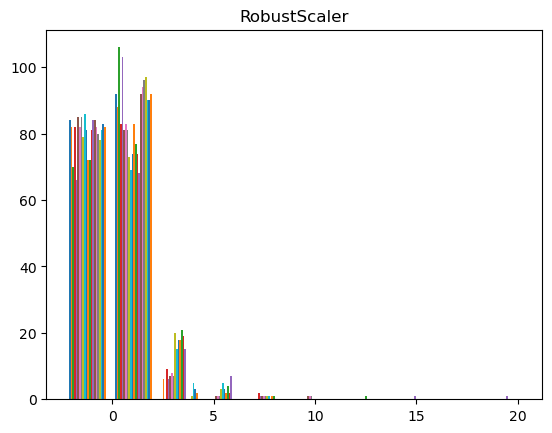

In [4]:
plt.hist(X_train_rob)
plt.title('RobustScaler')
plt.show()

## Isolation Forest for Anomaly Detection

In [5]:
#use the isolation forest model to search for anomalies on the scaled/transformed data
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

# Fit the model to the RobustScaler data
clf.fit(X_train_rob)

# create a column for the predictions of the RobustScaler data
df['anomaly_score'] = clf.decision_function(X_train_rob)
df['outlier'] = clf.predict(X_train_rob)
rob_anomaly_test = clf.decision_function(X_test_rob)
rob_anomalies_test = rob_anomaly_test < anomaly_threshold
rob_anomaly_val = clf.decision_function(X_val_rob)
rob_anomalies_val = rob_anomaly_val < anomaly_threshold
rob_train_out = df.loc[df['outlier'] == -1].index

# show the number of outliers for the RobustScaler data
print('RobustScaler')
print(df['outlier'].value_counts())
print(rob_anomalies_test)
print(rob_anomalies_val)
display(df.loc[df['outlier'] == -1])

RobustScaler
outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
49,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.084057,-1
79,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.102646,-1


In [6]:
# Remove the outliers 
X_train_no_outliers_rob = np.delete(X_train_rob, rob_train_out, axis=0)
y_train_no_outliers_rob = np.delete(train_y, rob_train_out)
X_no_outliers_rob = np.delete(X, rob_train_out, axis=0)
y_no_outliers_rob = np.delete(y, rob_train_out)

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.170869,-1.0,-0.084057
1,1.0,0.236341,-1.0,-0.102646


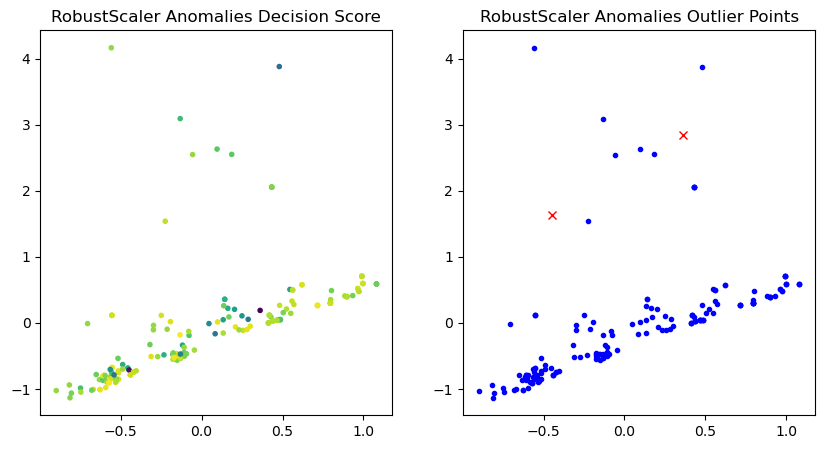

In [7]:
fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(10, 5))

clf.fit(X_train_rob)
predictions_rob = clf.predict(X_train_rob)

ax1.scatter(X_train_rob[:, 0], X_train_rob[:, 1], c=clf.decision_function(X_train_rob), marker='.')
ax1.set_title('RobustScaler Anomalies Decision Score')
ax2.plot(X_train_rob[predictions_rob==1][:,0], X_train_rob[predictions_rob==1][:,1], 'b.')
ax2.plot(X_train_rob[predictions_rob==-1][:,0], X_train_rob[predictions_rob==-1][:,-1], 'rx')
ax2.set_title('RobustScaler Anomalies Outlier Points')

df = pd.DataFrame(dict(predicted_label=clf.predict(X_train_rob), score=clf.decision_function(X_train_rob)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
rob_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(rob_scores)

## Experimenting on the RobustScaler data with Outliers Intact

### Experimenting with PCA for Dimensionality Reduction - RobustScaler

Component 1: Explained Variance 0.7276516689592278
Component 2: Explained Variance 0.8357149048152991
Component 3: Explained Variance 0.8833486283300022
Component 4: Explained Variance 0.9140078014006827
Component 5: Explained Variance 0.9368632013103796
Component 6: Explained Variance 0.9528734878883569
Component 7: Explained Variance 0.9673011075280253
Component 8: Explained Variance 0.9770396763096316
Component 9: Explained Variance 0.9845681706480669
Component 10: Explained Variance 0.9883605596717862
Component 11: Explained Variance 0.9917720128629427
Component 12: Explained Variance 0.9946842764498116
Component 13: Explained Variance 0.9963406412462511
Component 14: Explained Variance 0.997867110601031
Component 15: Explained Variance 0.9985170237035071
Component 16: Explained Variance 0.9991067932905809
Component 17: Explained Variance 0.9995503893065621
Component 18: Explained Variance 0.9997626551979824
Component 19: Explained Variance 0.9999532836087233
Component 20: Explaine

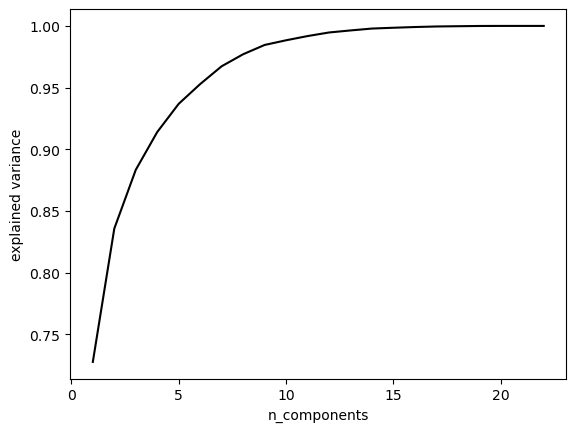

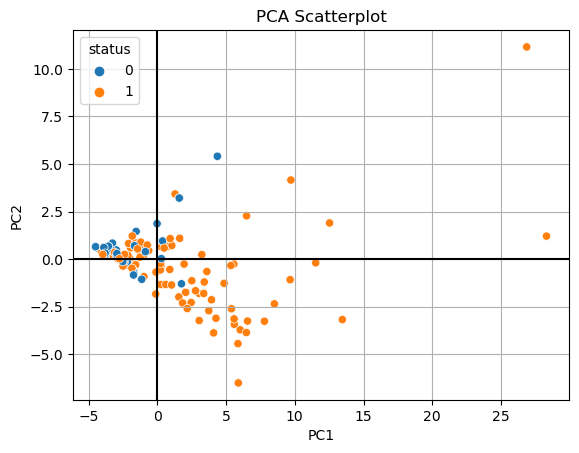

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.029233     -0.005224     -0.036925        0.243428   
PC-2     0.080889      0.164504      0.031914        0.194772   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.195030  0.256925  0.249760    0.257677      0.270954   
PC-2          0.123188  0.233089  0.102685    0.233796     -0.258129   

      MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
PC-1          0.288206  ...  0.315690     0.242706  0.437800 -0.127946   
PC-2         -0.223714  ... -0.294207    -0.228072  0.581988  0.041263   

          RPDE       DFA   spread1   spread2        D2       PPE  
PC-1  0.071259  0.020837  0.108386  0.111371  0.109835  0.112711  
PC-2 -0.068024 -0.128464 -0.074602 -0.134967 -0.040064 -0.090081  

[2 rows x 22 columns]


In [8]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA

#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob = None
max_expvar_rob = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob:
        max_expvar_rob = explained_variance
        best_comp_rob = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 2)

#fit the model and transform the data
transformed_rob = pca.fit_transform(X_train_rob)

#create a dataframe of the transformed data
df_rob = pd.DataFrame(transformed_rob, columns=['PC1', 'PC2'])
df_rob['status'] = train_y

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2']))

### Experimenting with Hierarchical Clustering for Feature Selection - RobustScaler

#### HC on RobustScaler

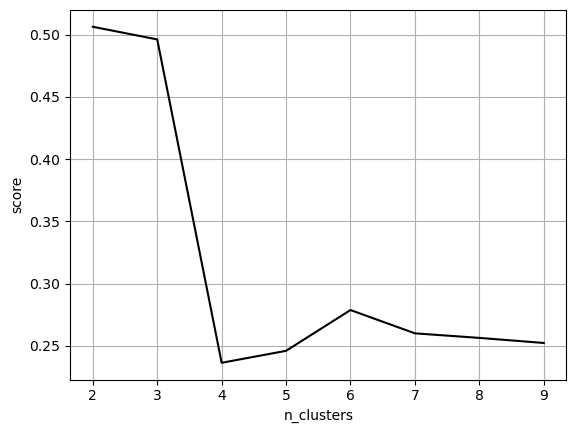

Cluster 2: Mean Silhouette Score: 0.5062796988023358
Cluster 3: Mean Silhouette Score: 0.4961267715083977
Cluster 4: Mean Silhouette Score: 0.23648251630533282
Cluster 5: Mean Silhouette Score: 0.24608067008975312
Cluster 6: Mean Silhouette Score: 0.27883642464655756
Cluster 7: Mean Silhouette Score: 0.26012298145502094
Cluster 8: Mean Silhouette Score: 0.2564672840961744
Cluster 9: Mean Silhouette Score: 0.25239402719900667


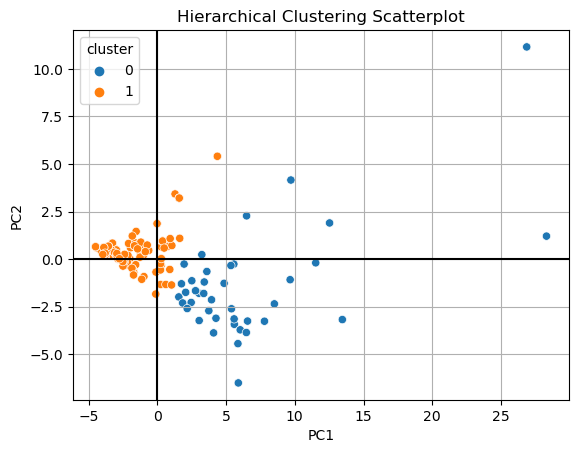

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.24740994379082903


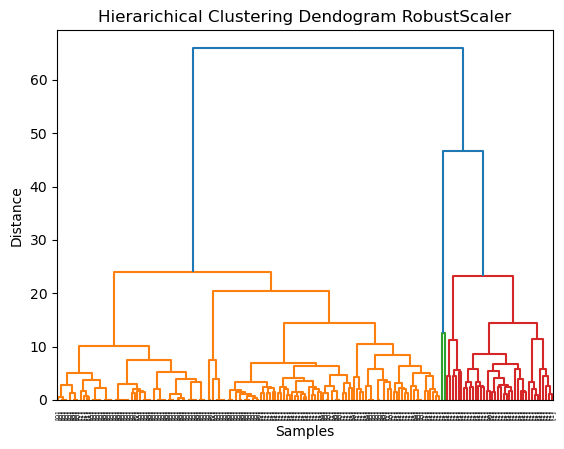

In [9]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(X_train_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

#### HC on RobustScaler scaled data and transformed by PCA

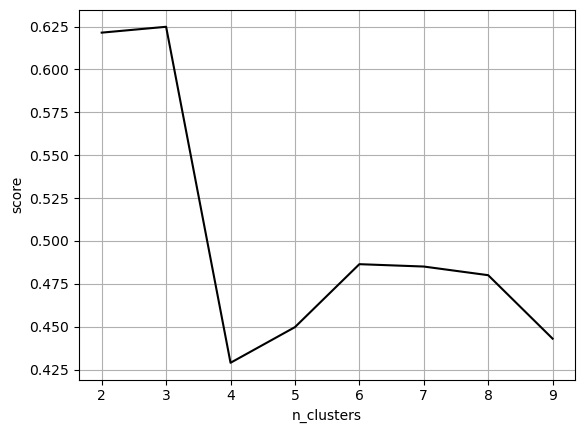

Cluster 2: Mean Silhouette Score: 0.6214795150904471
Cluster 3: Mean Silhouette Score: 0.624893265618451
Cluster 4: Mean Silhouette Score: 0.42892078437450354
Cluster 5: Mean Silhouette Score: 0.4497123693370862
Cluster 6: Mean Silhouette Score: 0.48643181060520324
Cluster 7: Mean Silhouette Score: 0.4850522467949425
Cluster 8: Mean Silhouette Score: 0.4800097108930918
Cluster 9: Mean Silhouette Score: 0.44299342103897693


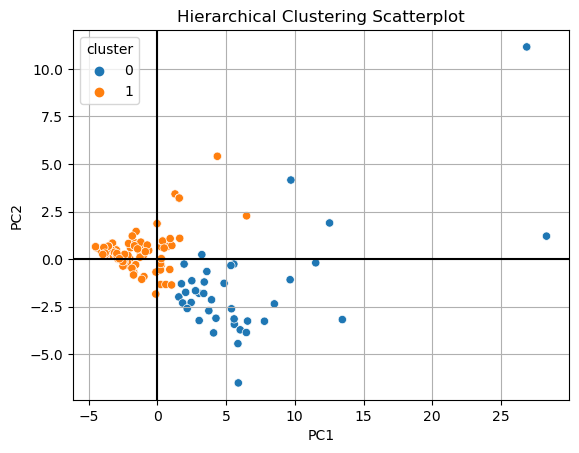

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler 0.24018621583207872


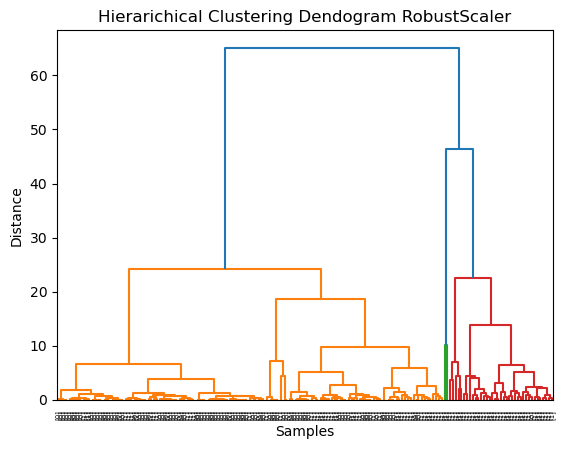

In [10]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(transformed_rob)

#create a column for the cluster
df_rob['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()

Z = linkage(transformed_rob, method='ward')
#Z = linkage(X_train_rob, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarichical Clustering Dendogram RobustScaler')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df_rob['cluster']))

### Logistic Regression - RobustScaler

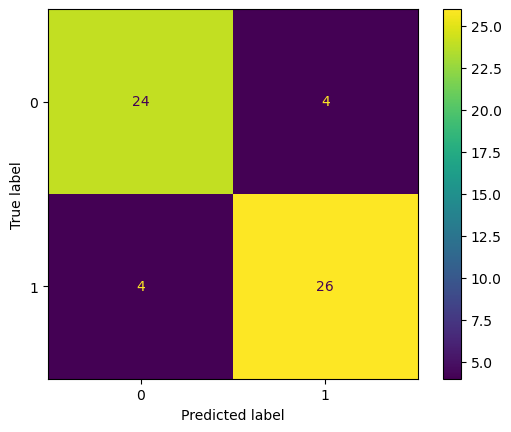

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.87      0.87      0.87        30

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

log_model.fit(transformed_rob, train_y.to_numpy().ravel())

transformed_test = pca.transform(X_test_rob)

predictions_rob = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob, labels=log_model.classes_))

[I 2023-12-05 23:21:22,499] A new study created in memory with name: no-name-28acb161-8d4c-46cc-95bb-42b3660d67b2
[I 2023-12-05 23:21:22,515] Trial 0 finished with value: 0.4137931034482759 and parameters: {'n_components': 12, 'C': 3.124923464657197}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:22,529] Trial 1 finished with value: 0.4137931034482759 and parameters: {'n_components': 6, 'C': 8.898818418883085}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:22,554] Trial 2 finished with value: 0.4137931034482759 and parameters: {'n_components': 22, 'C': 6.723081231501354}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:22,569] Trial 3 finished with value: 0.4137931034482759 and parameters: {'n_components': 6, 'C': 2.0831986085858056}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:22,583] Trial 4 finished with value: 0.4137931034482759 and parameters: {'n_components': 5, 'C': 2.2607265753662555}. Best 

[I 2023-12-05 23:21:23,726] Trial 44 finished with value: 0.4137931034482759 and parameters: {'n_components': 7, 'C': 2.787460738724617}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:23,759] Trial 45 finished with value: 0.4137931034482759 and parameters: {'n_components': 4, 'C': 2.576759597403967}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:23,787] Trial 46 finished with value: 0.4137931034482759 and parameters: {'n_components': 17, 'C': 3.278343344906764}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:23,814] Trial 47 finished with value: 0.4137931034482759 and parameters: {'n_components': 1, 'C': 8.857232662572176}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:23,847] Trial 48 finished with value: 0.4137931034482759 and parameters: {'n_components': 7, 'C': 9.524612447964698}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:23,875] Trial 49 finished with value: 0.413793103

Pipeline Accuracy on Test Set: 0.4827586206896552


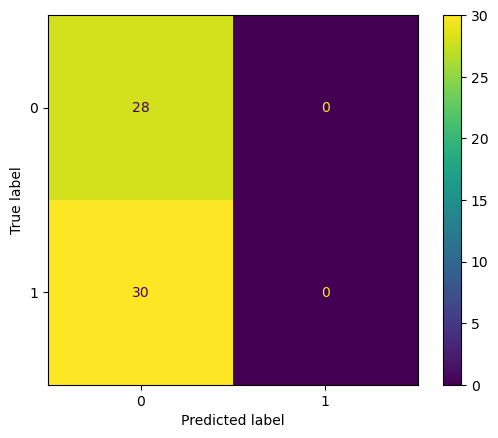

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        28
           1       0.00      0.00      0.00        30

    accuracy                           0.48        58
   macro avg       0.24      0.50      0.33        58
weighted avg       0.23      0.48      0.31        58



C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
import optuna
from sklearn.pipeline import Pipeline

def objective(trial):
    n_components = trial.suggest_int('n_components', 1, min(X.shape[0], X.shape[1]), log=False)
    C = trial.suggest_float('C', 1, 10, log=True)

    # Create the pipeline with Logistic Regression classifier
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('classifier', LogisticRegression(C=C)) 
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_rob, train_y.to_numpy().ravel())

    # Evaluate the pipeline on the validation set
    y_pred_val = pipeline.predict(val_X.values)
    accuracy_val = accuracy_score(val_y, y_pred_val)

    return 1.0 - accuracy_val

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline = Pipeline([
    ('pca', PCA(n_components=best_params['n_components'])),
    ('classifier', LogisticRegression(C=best_params['C']))
])
best_pipeline.fit(X_train_rob, train_y.to_numpy().ravel())

# Evaluate the best pipeline on the test set
y_pred_best_lgr = best_pipeline.predict(test_X.values)
accuracy_best_lgr = accuracy_score(test_y, y_pred_best_lgr)
print(f"Pipeline Accuracy on Test Set: {accuracy_best_lgr}")


cm_rob = confusion_matrix(test_y, y_pred_best_lgr, labels=best_pipeline.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=best_pipeline.classes_)
disp.plot()
plt.show()

print(classification_report(test_y, y_pred_best_lgr, labels=best_pipeline.classes_))

### Decision Tree - RobustScaler

In [13]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_rob)

# fit the model
dt.fit(transformed_rob, train_y.to_numpy().ravel())
transformed_test = pca.transform(X_test_rob)

predict_rob_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8620689655172413


Depth:1 and Scores:0.6924836601307189
Depth:2 and Scores:0.7271241830065359
Depth:3 and Scores:0.79640522875817
Depth:4 and Scores:0.831045751633987
Depth:5 and Scores:0.8372549019607843
Depth:6 and Scores:0.8428104575163399
Depth:7 and Scores:0.8428104575163399
Depth:8 and Scores:0.8428104575163399
Depth:9 and Scores:0.8428104575163399
Depth:10 and Scores:0.8428104575163399
Depth:11 and Scores:0.8428104575163399
Depth:12 and Scores:0.8428104575163399
Depth:13 and Scores:0.8428104575163399
Depth:14 and Scores:0.8428104575163399
Feature:1 and Scores:0.8179738562091503
Feature:2 and Scores:0.8356209150326798
Feature:3 and Scores:0.8411764705882353
Feature:4 and Scores:0.8359477124183007
Feature:5 and Scores:0.8245098039215686
Feature:6 and Scores:0.9032679738562092
Feature:7 and Scores:0.8418300653594771
Feature:8 and Scores:0.8640522875816995
Feature:9 and Scores:0.8473856209150327
Feature:10 and Scores:0.8699346405228757
Feature:11 and Scores:0.869607843137255
Feature:12 and Scores:0.8

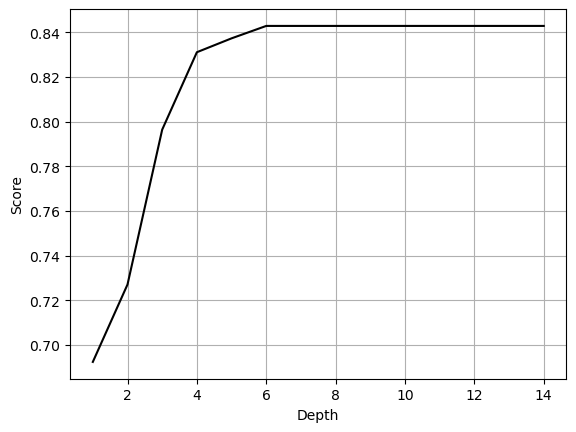

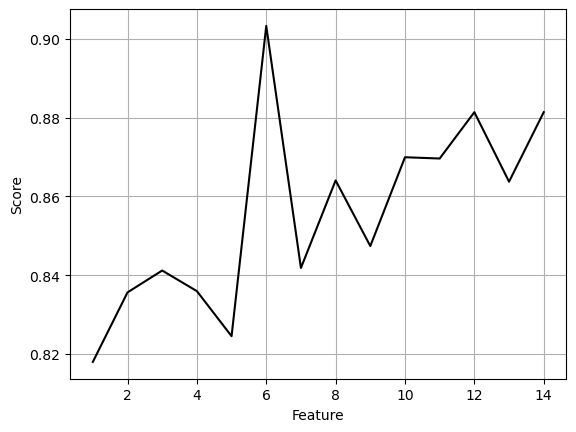

In [14]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()


<Figure size 8000x2000 with 0 Axes>

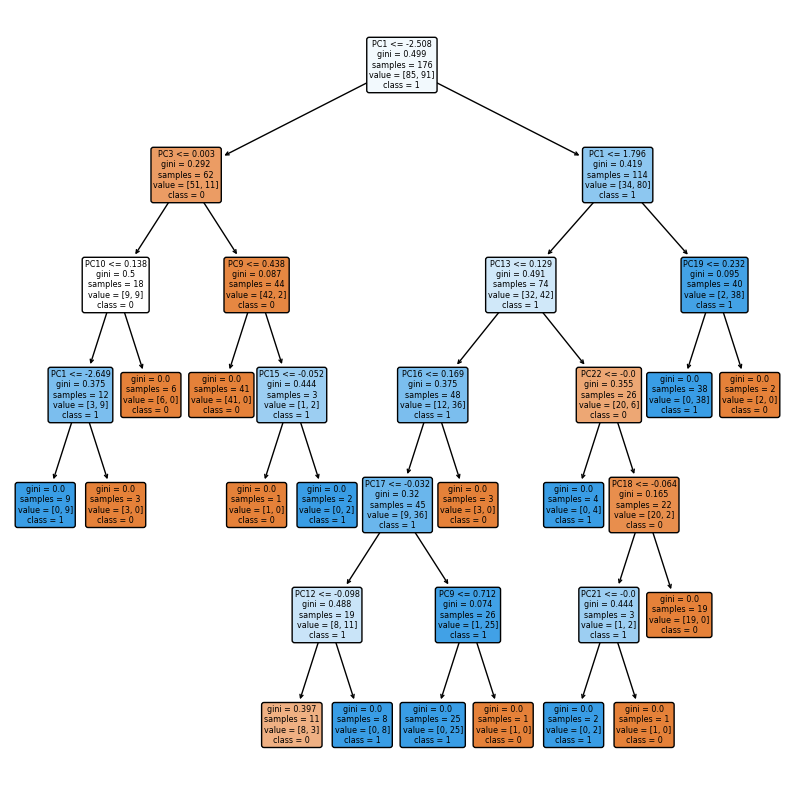

Best depth score: 6 and Best feature score: 6


In [15]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob = pca.fit_transform(X_train_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+ 1)

dt.fit(transformed_rob, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()
print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

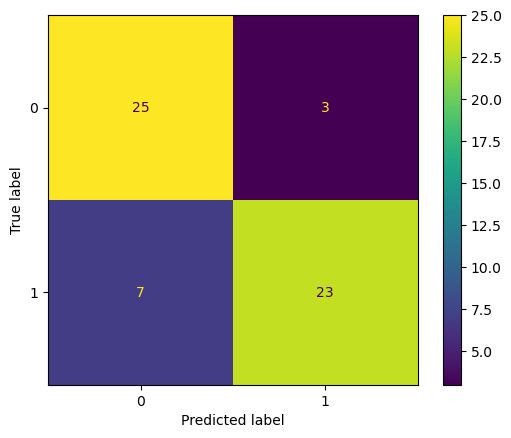

Accuracy on Test Set:0.8275862068965517
Accuracy on Validation Set: 0.7413793103448276


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores), max_features=np.argmax(fscores))
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores))
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores))

dt.fit(transformed_rob, train_y)
transformed_val = pca.transform(X_val_rob)

predict_rob_test = dt.predict(transformed_test)
predict_rob_val = dt.predict(transformed_val)

cm_rob = confusion_matrix(test_y, predict_rob_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_rob_test)
print(f'Accuracy on Test Set:{accuracy}')

accuracy_val = accuracy_score(val_y, predict_rob_val)
print(f'Accuracy on Validation Set: {accuracy_val}')

In [17]:
from sklearn.pipeline import Pipeline
import optuna

def objective(trial):
    n_components = trial.suggest_int('n_components', 1, min(X.shape[0], X.shape[1]), log=False)
    max_depth = trial.suggest_int('max_depth', 1, min(X.shape[0], X.shape[1]), log=False)
    min_samples_split = trial.suggest_float('min_samples_split', 0.0, 1.0, log=False)
    
    # Create the pipeline with SVM classifier
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('classifier', DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split))  
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_rob, train_y)

    # Evaluate the pipeline on the validation set
    y_pred_val = pipeline.predict(val_X.values)
    accuracy_val = accuracy_score(val_y.values.ravel(), y_pred_val)

    return 1.0 - accuracy_val

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline_dt = Pipeline([
    ('pca', PCA(n_components=best_params['n_components'])),
    ('classifier', DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                          min_samples_split=best_params['min_samples_split']))
])
best_pipeline_dt.fit(X_train_rob, train_y)

# Evaluate the best pipeline on the test set
y_pred_best_dt = best_pipeline_dt.predict(test_X.values)
accuracy_best_dt = accuracy_score(test_y, y_pred_best_dt)
print(f"Pipeline Accuracy on Test Set: {accuracy_best_dt}")

[I 2023-12-05 23:21:27,823] A new study created in memory with name: no-name-0581cbbd-23cc-42c4-8985-895063c79faf
[I 2023-12-05 23:21:27,833] Trial 0 finished with value: 0.4137931034482759 and parameters: {'n_components': 15, 'max_depth': 1, 'min_samples_split': 0.3429545158932199}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:27,841] Trial 1 finished with value: 0.4137931034482759 and parameters: {'n_components': 14, 'max_depth': 10, 'min_samples_split': 0.8417026646741953}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:27,848] Trial 2 finished with value: 0.4137931034482759 and parameters: {'n_components': 4, 'max_depth': 8, 'min_samples_split': 0.6475192384044469}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:27,858] Trial 3 finished with value: 0.4137931034482759 and parameters: {'n_components': 8, 'max_depth': 4, 'min_samples_split': 0.3175209051927742}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-

[I 2023-12-05 23:21:28,783] Trial 37 finished with value: 0.4137931034482759 and parameters: {'n_components': 11, 'max_depth': 5, 'min_samples_split': 0.9073372429001388}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:28,810] Trial 38 finished with value: 0.4137931034482759 and parameters: {'n_components': 2, 'max_depth': 9, 'min_samples_split': 0.6269753889260202}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:28,834] Trial 39 finished with value: 0.4137931034482759 and parameters: {'n_components': 13, 'max_depth': 19, 'min_samples_split': 0.7703635886188109}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:28,865] Trial 40 finished with value: 0.4137931034482759 and parameters: {'n_components': 6, 'max_depth': 12, 'min_samples_split': 0.429123268599381}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:28,894] Trial 41 finished with value: 0.4137931034482759 and parameters: {'n_components': 7, 'max_dep

Pipeline Accuracy on Test Set: 0.4827586206896552


### Experimenting with SVM - RobustScaler

In [18]:
train_y = train_y.to_numpy().ravel()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=42)

svc.fit(X_train_rob,train_y)

accuracies = cross_val_score(svc,X_train_rob,train_y,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.7787301587301587
Test Score: 0.5172413793103449


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC())
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_rob, train_y)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_rob[:, 0:2]
#Obtain decision boundary values
best_model.fit(X, train_y)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, levels=[Z.min(), 0, Z.max()], alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Sample hyperparameters for the SVM
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])

    # Create the pipeline
    svm = SVC(C=C, kernel=kernel)

    pipeline = Pipeline([
        ('svm', svm)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_rob, train_y.ravel())

    # Evaluate the pipeline on the validation set
    y_pred = pipeline.predict(test_X.values)
    accuracy = accuracy_score(test_y.values.ravel(), y_pred)

    return 1.0 - accuracy  # Optuna minimizes the objective function

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline = Pipeline([
    ('svm', SVC(C=best_params['C'], kernel=best_params['kernel']))
])
best_pipeline.fit(X_train_rob, train_y.ravel())

# Evaluate the best pipeline on the test set
y_pred_best = best_pipeline.predict(test_X.values)
accuracy_best = accuracy_score(test_y.values.ravel(), y_pred_best)
print(f"Pipeline Accuracy: {accuracy_best}")

[I 2023-12-05 23:21:29,318] A new study created in memory with name: no-name-55ab0c19-5bcb-4362-996c-b00044aeb110
[I 2023-12-05 23:21:29,326] Trial 0 finished with value: 0.5172413793103448 and parameters: {'C': 0.010757099127592186, 'kernel': 'poly'}. Best is trial 0 with value: 0.5172413793103448.
[I 2023-12-05 23:21:29,335] Trial 1 finished with value: 0.48275862068965514 and parameters: {'C': 0.0999170116560824, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,341] Trial 2 finished with value: 0.48275862068965514 and parameters: {'C': 70.40752431985808, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,349] Trial 3 finished with value: 0.48275862068965514 and parameters: {'C': 0.17962585767797004, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,356] Trial 4 finished with value: 0.5172413793103448 and parameters: {'C': 0.07481861528399583, 'kernel': 'linear'}. B

[I 2023-12-05 23:21:29,896] Trial 44 finished with value: 0.48275862068965514 and parameters: {'C': 0.03126590815684355, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,915] Trial 45 finished with value: 0.48275862068965514 and parameters: {'C': 0.05590074346847827, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,927] Trial 46 finished with value: 0.5172413793103448 and parameters: {'C': 0.12025140211523655, 'kernel': 'linear'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,943] Trial 47 finished with value: 0.48275862068965514 and parameters: {'C': 0.02812594687573451, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,959] Trial 48 finished with value: 0.48275862068965514 and parameters: {'C': 0.041454130769730105, 'kernel': 'rbf'}. Best is trial 1 with value: 0.48275862068965514.
[I 2023-12-05 23:21:29,974] Trial 49 finished with value:

Pipeline Accuracy: 0.5172413793103449


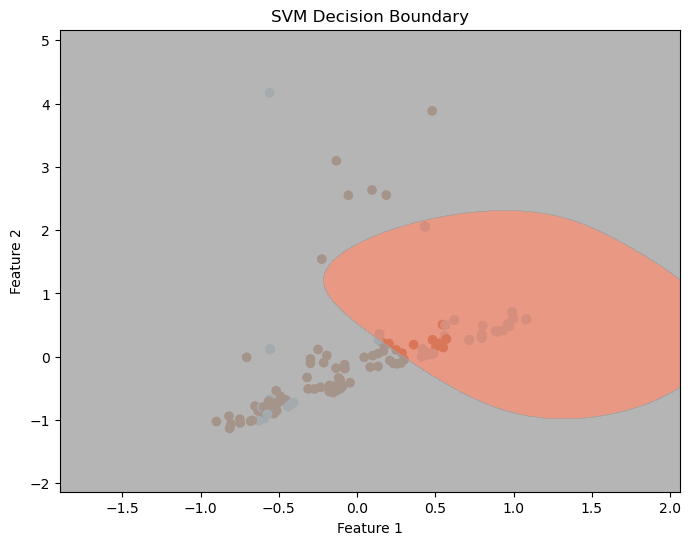

In [21]:
# Get the best model from the pipeline
best_model = best_pipeline.named_steps['svm']

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of the training points
plt.scatter(X_train_rob[:, 0], X_train_rob[:, 1], c=train_y, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_rob[:, 0].min() - 1, X_train_rob[:, 0].max() + 1
y_min, y_max = X_train_rob[:, 1].min() - 1, X_train_rob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X2 = X_train_rob[:, 0:2]
# Obtain decision boundary values
best_model.fit(X2, train_y)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, levels=[Z.min(), 0, Z.max()], alpha=0.8)

# Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

## Experimenting on RobustScaler data with Outliers Removed

### Experimenting with PCA for Dimensionality Reduction - RobustScaler Outliers Removed

Component 1: Explained Variance 0.6627381455009128
Component 2: Explained Variance 0.774303658195082
Component 3: Explained Variance 0.8447189839816794
Component 4: Explained Variance 0.8872546981652012
Component 5: Explained Variance 0.9150663963157901
Component 6: Explained Variance 0.9378226003157912
Component 7: Explained Variance 0.9562696585567991
Component 8: Explained Variance 0.9696426220437202
Component 9: Explained Variance 0.9783804173783079
Component 10: Explained Variance 0.9839821721426053
Component 11: Explained Variance 0.9887012628402089
Component 12: Explained Variance 0.9925692204307094
Component 13: Explained Variance 0.9949288489066349
Component 14: Explained Variance 0.9971268987000879
Component 15: Explained Variance 0.9980657625314795
Component 16: Explained Variance 0.9989009733634946
Component 17: Explained Variance 0.9994348209402866
Component 18: Explained Variance 0.9997064687186886
Component 19: Explained Variance 0.9999351635425563
Component 20: Explaine

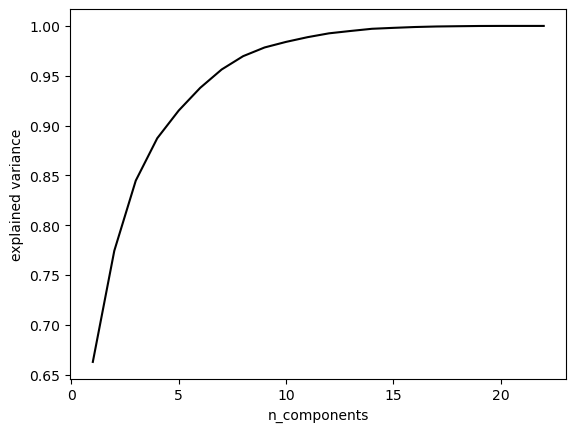

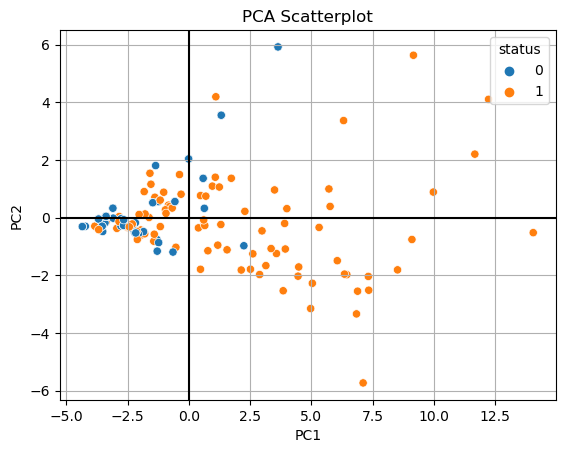

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.049033     -0.009555     -0.064204        0.211961   
PC-2     0.080429      0.281878     -0.025721        0.260144   
PC-3     0.358614      0.435558      0.209908       -0.125242   
PC-4    -0.056298      0.229779     -0.158276       -0.188958   
PC-5     0.166300      0.343794      0.168203        0.095141   
PC-6     0.041229      0.565620      0.052416        0.052519   
PC-7    -0.004863     -0.040093      0.157382        0.014681   
PC-8    -0.379363      0.415093     -0.576693       -0.029832   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1          0.179749  0.210998  0.225258    0.211573      0.309807   
PC-2          0.141403  0.266556  0.180774    0.267255     -0.228763   
PC-3         -0.304658 -0.081920 -0.143539   -0.082180      0.131959   
PC-4         -0.140273 -0.266788 -0.235150   -0.267704     -0.030902   
PC-5         -0.022858  0.120458  0.216138    0.120766

In [22]:
#use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA


#test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers_rob) for n in n_components]

#plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_rob_no = None
max_expvar_rob_no = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_rob_no:
        max_expvar_rob_no = explained_variance
        best_comp_rob_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


#create the model
pca = PCA(n_components = 8)

#fit the model and transform the data
transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

#create a dataframe of the transformed data
df_rob_no = pd.DataFrame(transformed_rob_no, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'])
df_rob_no['status'] = y_train_no_outliers_rob

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='status', data=df_rob_no)

#make title
plt.title('PCA Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


#show components relations with features:
print(pd.DataFrame(pca.components_,columns=train_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8']))

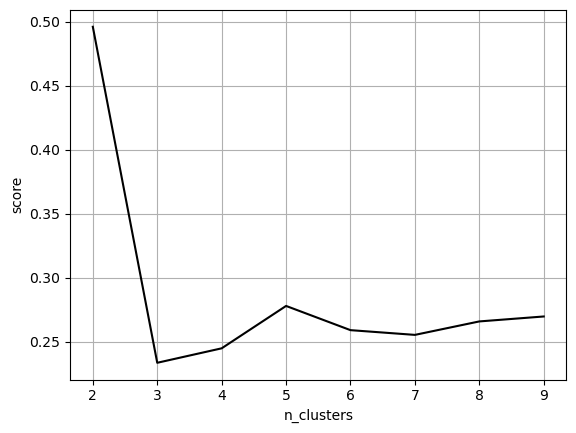

Cluster 2: Mean Silhouette Score: 0.4961177809754951
Cluster 3: Mean Silhouette Score: 0.23348910903064157
Cluster 4: Mean Silhouette Score: 0.2447891075773222
Cluster 5: Mean Silhouette Score: 0.27792136503167053
Cluster 6: Mean Silhouette Score: 0.2589928247816277
Cluster 7: Mean Silhouette Score: 0.2552951079129095
Cluster 8: Mean Silhouette Score: 0.26581562949023346
Cluster 9: Mean Silhouette Score: 0.26968121576792714


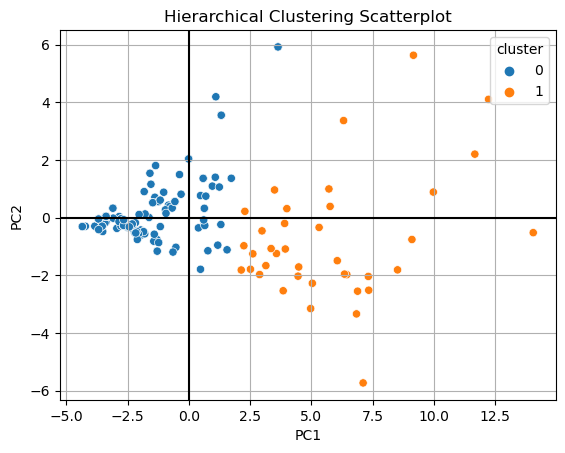

Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers 0.24040575826735086


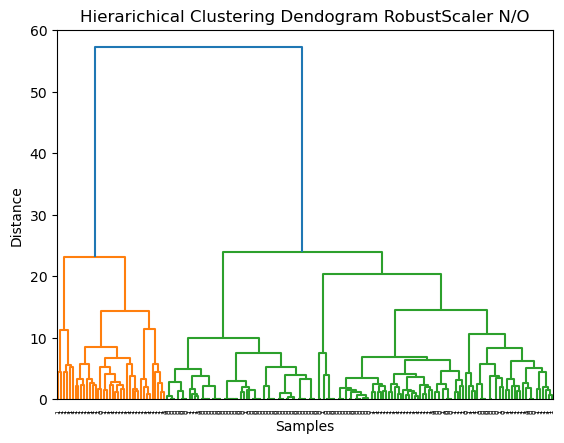

In [23]:
#create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers_rob) for n in n_clusters]

#plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers_rob, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

#fit the model
hi_model.fit(X_train_no_outliers_rob)


#create a column for the cluster
df_rob_no['cluster'] = hi_model.labels_

#create a scatterplot of the data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_rob_no)

#make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
#add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#show the plot
plt.show()


Z = linkage(X_train_no_outliers_rob, method='ward')
#Z = linkage(X_train_no_outliers_rob, method='average')
dendrogram(Z, labels=y_train_no_outliers_rob)
plt.title('Hierarichical Clustering Dendogram RobustScaler N/O')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for RobustScaler No Outliers", 
      normalized_mutual_info_score(y_train_no_outliers_rob, df_rob_no['cluster']))

### Experimenting with Logistic Regression - RobustScaler Outliers Removed

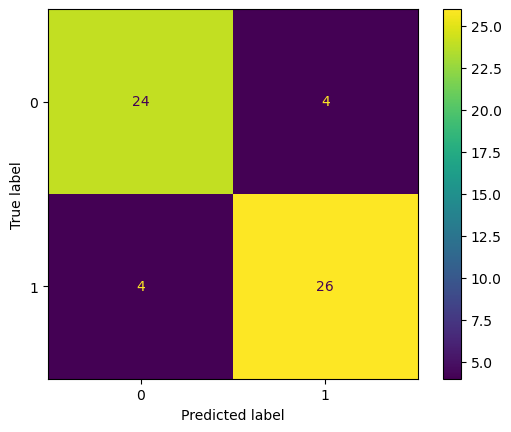

Accuracy:0.8620689655172413
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.87      0.87      0.87        30

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.get_params()

pca = PCA(n_components = best_comp_rob)
transformed_rob = pca.fit_transform(X_train_no_outliers_rob)

log_model.fit(transformed_rob, y_train_no_outliers_rob.ravel())
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = log_model.predict(transformed_test)

cm_rob = confusion_matrix(test_y, predictions_rob_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_rob, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_rob_no, labels=log_model.classes_))

[I 2023-12-05 23:21:35,154] A new study created in memory with name: no-name-b4da9d4d-8445-4676-aaa7-33b4e803230c
[I 2023-12-05 23:21:35,196] Trial 0 finished with value: 0.4137931034482759 and parameters: {'n_components': 10, 'C': 2.447792254099201}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:35,215] Trial 1 finished with value: 0.4137931034482759 and parameters: {'n_components': 3, 'C': 1.196113226223558}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:35,239] Trial 2 finished with value: 0.4137931034482759 and parameters: {'n_components': 20, 'C': 7.53451478365702}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:35,259] Trial 3 finished with value: 0.4137931034482759 and parameters: {'n_components': 13, 'C': 4.520205828217612}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:35,278] Trial 4 finished with value: 0.4137931034482759 and parameters: {'n_components': 13, 'C': 2.6831437161419207}. Best 

[I 2023-12-05 23:21:36,618] Trial 44 finished with value: 0.4137931034482759 and parameters: {'n_components': 3, 'C': 2.2365084674779805}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:36,653] Trial 45 finished with value: 0.4137931034482759 and parameters: {'n_components': 10, 'C': 3.4201751494525605}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:36,691] Trial 46 finished with value: 0.4137931034482759 and parameters: {'n_components': 14, 'C': 2.721293085928639}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:36,725] Trial 47 finished with value: 0.4137931034482759 and parameters: {'n_components': 10, 'C': 2.453728741117778}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:36,758] Trial 48 finished with value: 0.4137931034482759 and parameters: {'n_components': 21, 'C': 4.330788982801234}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:36,794] Trial 49 finished with value: 0.4137

Pipeline Accuracy on Test Set: 0.4827586206896552


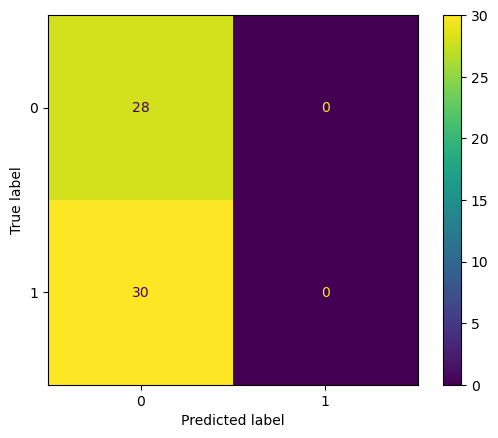

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        28
           1       0.00      0.00      0.00        30

    accuracy                           0.48        58
   macro avg       0.24      0.50      0.33        58
weighted avg       0.23      0.48      0.31        58



C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tessa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
def objective(trial):
    n_components = trial.suggest_int('n_components', 1, min(X_no_outliers_rob.shape[0], X_no_outliers_rob.shape[1]), log=False)
    C = trial.suggest_float('C', 1, 10, log=True)

    # Create the pipeline with Logistic Regression classifier
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('classifier', LogisticRegression(C=C)) 
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_no_outliers_rob, y_train_no_outliers_rob.ravel())

    # Evaluate the pipeline on the validation set
    y_pred_val = pipeline.predict(val_X.values)
    accuracy_val = accuracy_score(val_y, y_pred_val)

    return 1.0 - accuracy_val

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline = Pipeline([
    ('pca', PCA(n_components=best_params['n_components'])),
    ('classifier', LogisticRegression(C=best_params['C']))
])
best_pipeline.fit(X_train_no_outliers_rob, y_train_no_outliers_rob.ravel())

# Evaluate the best pipeline on the test set
y_pred_best_lgr = best_pipeline.predict(test_X.values)
accuracy_best_lgr = accuracy_score(test_y, y_pred_best_lgr)
print(f"Pipeline Accuracy on Test Set: {accuracy_best_lgr}")


cm_rob_no = confusion_matrix(test_y, y_pred_best_lgr, labels=best_pipeline.classes_)
disp = ConfusionMatrixDisplay(cm_rob_no, display_labels=best_pipeline.classes_)
disp.plot()
plt.show()

print(classification_report(test_y, y_pred_best_lgr, labels=best_pipeline.classes_))

### Experimenting with Decision Tree - RobustScaler Outliers Removed

In [26]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()
pca = PCA(n_components = best_comp_rob_no)

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

# fit the model
dt.fit(transformed_rob_no, y_train_no_outliers_rob)
transformed_test = pca.transform(X_test_rob)

predictions_rob_no = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predictions_rob_no)
accuracy

0.9482758620689655

Depth:1 and Scores:0.26968121576792714
Depth:2 and Scores:0.26968121576792714
Depth:3 and Scores:0.26968121576792714
Depth:4 and Scores:0.26968121576792714
Depth:5 and Scores:0.26968121576792714
Depth:6 and Scores:0.26968121576792714
Depth:7 and Scores:0.26968121576792714
Depth:8 and Scores:0.26968121576792714
Depth:9 and Scores:0.26968121576792714
Depth:10 and Scores:0.26968121576792714
Depth:11 and Scores:0.26968121576792714
Depth:12 and Scores:0.26968121576792714
Depth:13 and Scores:0.26968121576792714
Depth:14 and Scores:0.26968121576792714
Feature:1 and Scores:0.8624183006535947
Feature:2 and Scores:0.8683006535947714
Feature:3 and Scores:0.8209150326797385
Feature:4 and Scores:0.8558823529411764
Feature:5 and Scores:0.8519607843137255
Feature:6 and Scores:0.8676470588235293
Feature:7 and Scores:0.837908496732026
Feature:8 and Scores:0.8735294117647058
Feature:9 and Scores:0.8745098039215687
Feature:10 and Scores:0.8630718954248365
Feature:11 and Scores:0.8627450980392156
Feature:

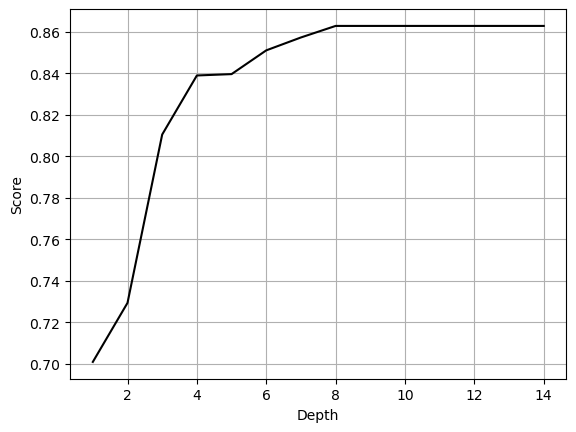

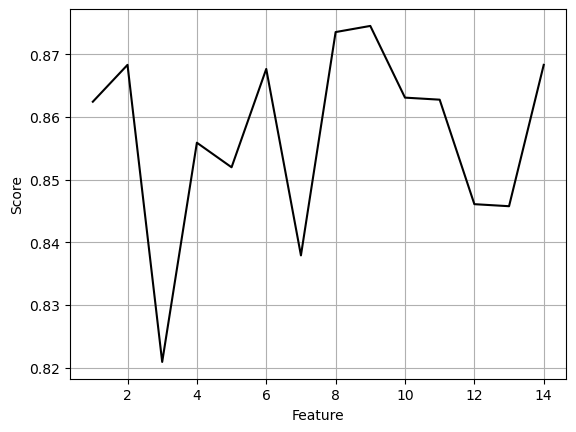

In [27]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{scores[-1]}')
    
feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_rob_no, y_train_no_outliers_rob, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

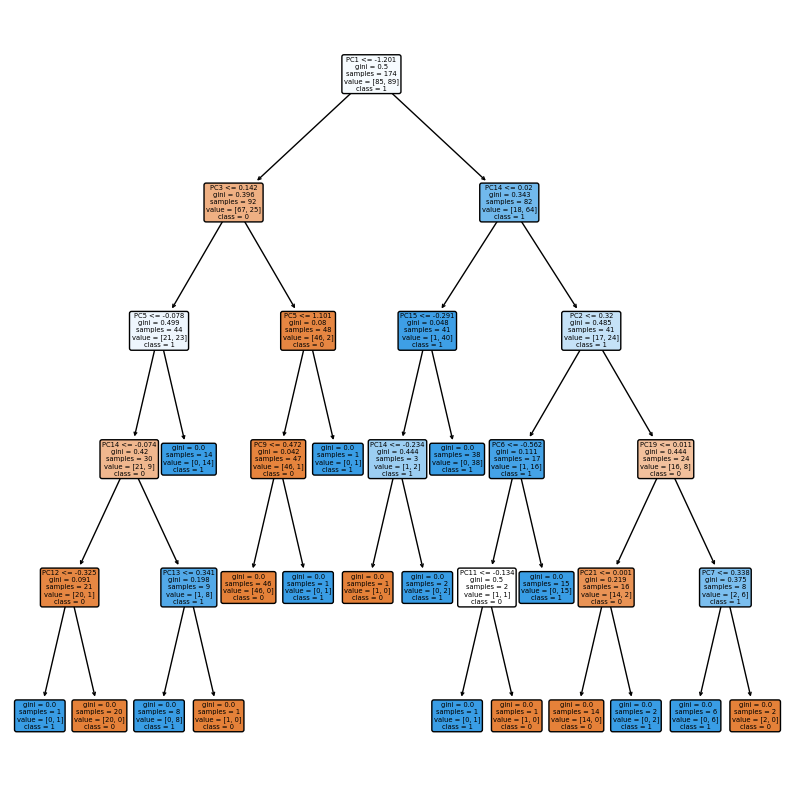

Best depth score: 8 and Best feature score: 9


In [28]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_rob_no = pca.fit_transform(X_train_no_outliers_rob)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_rob_no, y_train_no_outliers_rob)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

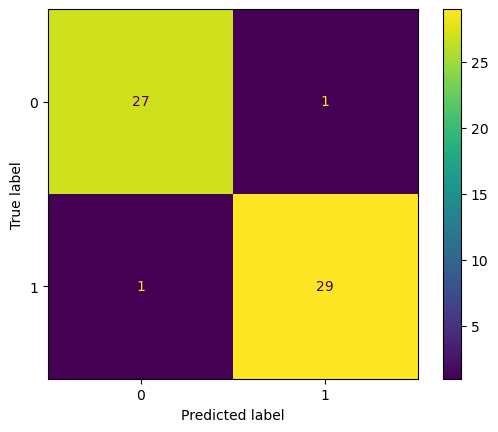

Accuracy on Test Set:0.9655172413793104
Accuracy on Validation Set: 0.8793103448275862


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_rob_no, y_train_no_outliers_rob)
transformed_val = pca.transform(X_val_rob)

predictions_rob_no = dt.predict(transformed_test)
predict_rob_val_no = dt.predict(transformed_val)

cm_rob_no = confusion_matrix(test_y, predictions_rob_no, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_rob_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_rob_no)
print(f'Accuracy on Test Set:{accuracy}')

accuracy_val = accuracy_score(val_y, predict_rob_val_no)
print(f'Accuracy on Validation Set: {accuracy_val}')

In [30]:
from sklearn.pipeline import Pipeline
import optuna

def objective(trial):
    n_components = trial.suggest_int('n_components', 1, min(X.shape[0], X.shape[1]), log=False)
    max_depth = trial.suggest_int('max_depth', 1, min(X.shape[0], X.shape[1]), log=False)
    min_samples_split = trial.suggest_float('min_samples_split', 0.0, 1.0, log=False)
    
    # Create the pipeline with SVM classifier
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('classifier', DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split))  
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

    # Evaluate the pipeline on the validation set
    y_pred_val = pipeline.predict(val_X.values)
    accuracy_val = accuracy_score(val_y.values.ravel(), y_pred_val)

    return 1.0 - accuracy_val

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline_dt = Pipeline([
    ('pca', PCA(n_components=best_params['n_components'])),
    ('classifier', DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                          min_samples_split=best_params['min_samples_split']))
])
best_pipeline_dt.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

# Evaluate the best pipeline on the test set
y_pred_best_dt = best_pipeline_dt.predict(test_X.values)
accuracy_best_dt = accuracy_score(test_y, y_pred_best_dt)
print(f"Pipeline Accuracy on Test Set: {accuracy_best_dt}")

[I 2023-12-05 23:21:40,092] A new study created in memory with name: no-name-b1d8557c-03ac-459f-b04b-3c992cb702c3
[I 2023-12-05 23:21:40,103] Trial 0 finished with value: 0.4137931034482759 and parameters: {'n_components': 21, 'max_depth': 10, 'min_samples_split': 0.4585348888166453}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:40,114] Trial 1 finished with value: 0.5862068965517242 and parameters: {'n_components': 16, 'max_depth': 19, 'min_samples_split': 0.06173455407139816}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:40,122] Trial 2 finished with value: 0.5862068965517242 and parameters: {'n_components': 15, 'max_depth': 6, 'min_samples_split': 0.09327184988486181}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:40,129] Trial 3 finished with value: 0.4137931034482759 and parameters: {'n_components': 10, 'max_depth': 8, 'min_samples_split': 0.9422556392870566}. Best is trial 0 with value: 0.4137931034482759.
[I 202

[I 2023-12-05 23:21:40,966] Trial 37 finished with value: 0.4137931034482759 and parameters: {'n_components': 13, 'max_depth': 5, 'min_samples_split': 0.9143632166651654}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:40,998] Trial 38 finished with value: 0.5862068965517242 and parameters: {'n_components': 4, 'max_depth': 14, 'min_samples_split': 0.14745783902265064}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:41,030] Trial 39 finished with value: 0.4137931034482759 and parameters: {'n_components': 21, 'max_depth': 7, 'min_samples_split': 0.628878487936873}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:41,057] Trial 40 finished with value: 0.4137931034482759 and parameters: {'n_components': 8, 'max_depth': 10, 'min_samples_split': 0.37136281194814363}. Best is trial 0 with value: 0.4137931034482759.
[I 2023-12-05 23:21:41,089] Trial 41 finished with value: 0.4137931034482759 and parameters: {'n_components': 8, 'max_d

Pipeline Accuracy on Test Set: 0.4827586206896552


## Experimenting with SVM - RobustScaler Outliers Removed

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
y_train_no_outliers_rob = y_train_no_outliers_rob.ravel()

In [33]:
svc = SVC(random_state=42)

svc.fit(X_train_no_outliers_rob,y_train_no_outliers_rob)

accuracies = cross_val_score(svc,X_train_no_outliers_rob,y_train_no_outliers_rob,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.8100840336134454
Test Score: 0.5172413793103449


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(X_train_no_outliers_rob[:, 0], X_train_no_outliers_rob[:, 1], c=y_train_no_outliers_rob, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_no_outliers_rob[:, 0].min() - 1, X_train_no_outliers_rob[:, 0].max() + 1
y_min, y_max = X_train_no_outliers_rob[:, 1].min() - 1, X_train_no_outliers_rob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_no_outliers_rob[:, 0:2]
#Obtain decision boundary values
best_model.fit(X, y_train_no_outliers_rob)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, levels=[Z.min(), 0, Z.max()], alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Sample hyperparameters for the SVM
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])

    # Create the pipeline
    svm = SVC(C=C, kernel=kernel)

    pipeline = Pipeline([
        ('svm', svm)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

    # Evaluate the pipeline on the validation set
    y_pred = pipeline.predict(test_X.values)
    accuracy = accuracy_score(test_y.values.ravel(), y_pred)

    return 1.0 - accuracy  # Optuna minimizes the objective function

# Create and run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params

# Train the best pipeline on the entire training set
best_pipeline = Pipeline([
    ('svm', SVC(C=best_params['C'], kernel=best_params['kernel']))
])
best_pipeline.fit(X_train_no_outliers_rob, y_train_no_outliers_rob)

# Evaluate the best pipeline on the test set
y_pred_best = best_pipeline.predict(test_X.values)
accuracy_best = accuracy_score(test_y.values.ravel(), y_pred_best)
print(f"Pipeline Accuracy: {accuracy_best}")

[I 2023-12-05 23:21:41,495] A new study created in memory with name: no-name-bc01eaf5-cbf2-4e1e-8f3f-03ebf7cf9e8a
[I 2023-12-05 23:21:41,505] Trial 0 finished with value: 0.43103448275862066 and parameters: {'C': 67.40199210847697, 'kernel': 'poly'}. Best is trial 0 with value: 0.43103448275862066.
[I 2023-12-05 23:21:41,513] Trial 1 finished with value: 0.48275862068965514 and parameters: {'C': 0.6816262554107567, 'kernel': 'rbf'}. Best is trial 0 with value: 0.43103448275862066.
[I 2023-12-05 23:21:41,523] Trial 2 finished with value: 0.48275862068965514 and parameters: {'C': 20.22253268706125, 'kernel': 'rbf'}. Best is trial 0 with value: 0.43103448275862066.
[I 2023-12-05 23:21:41,530] Trial 3 finished with value: 0.5172413793103448 and parameters: {'C': 0.012849888534291053, 'kernel': 'linear'}. Best is trial 0 with value: 0.43103448275862066.
[I 2023-12-05 23:21:41,537] Trial 4 finished with value: 0.5172413793103448 and parameters: {'C': 0.13123151217852205, 'kernel': 'linear'}.

[I 2023-12-05 23:21:42,314] Trial 44 finished with value: 0.39655172413793105 and parameters: {'C': 96.57941316633608, 'kernel': 'poly'}. Best is trial 11 with value: 0.39655172413793105.
[I 2023-12-05 23:21:42,329] Trial 45 finished with value: 0.5172413793103448 and parameters: {'C': 30.089095321873497, 'kernel': 'poly'}. Best is trial 11 with value: 0.39655172413793105.
[I 2023-12-05 23:21:42,344] Trial 46 finished with value: 0.5172413793103448 and parameters: {'C': 40.49562416654819, 'kernel': 'poly'}. Best is trial 11 with value: 0.39655172413793105.
[I 2023-12-05 23:21:42,473] Trial 47 finished with value: 0.5862068965517242 and parameters: {'C': 70.37305479110766, 'kernel': 'linear'}. Best is trial 11 with value: 0.39655172413793105.
[I 2023-12-05 23:21:42,484] Trial 48 finished with value: 0.5172413793103448 and parameters: {'C': 18.43328173467661, 'kernel': 'poly'}. Best is trial 11 with value: 0.39655172413793105.
[I 2023-12-05 23:21:42,496] Trial 49 finished with value: 0.5

Pipeline Accuracy: 0.603448275862069


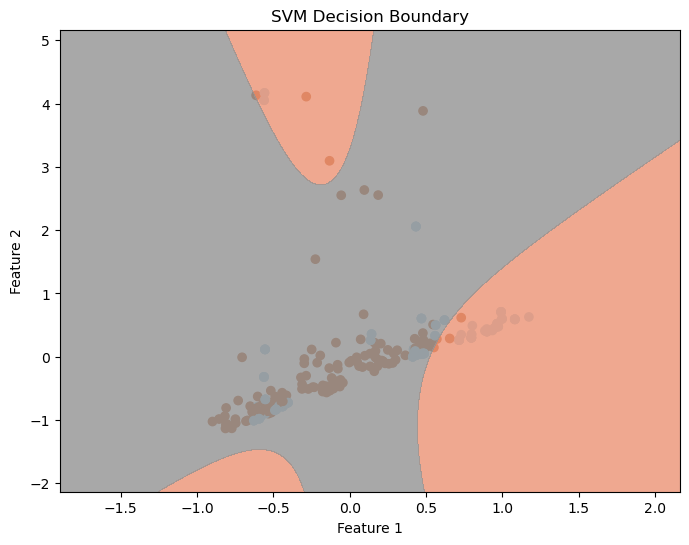

In [35]:
# Get the best model from the pipeline
best_model = best_pipeline.named_steps['svm']

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Scatter plot of the training points
plt.scatter(X_no_outliers_rob[:, 0], X_no_outliers_rob[:, 1], c=y_no_outliers_rob, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_no_outliers_rob[:, 0].min() - 1, X_no_outliers_rob[:, 0].max() + 1
y_min, y_max = X_no_outliers_rob[:, 1].min() - 1, X_no_outliers_rob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X2 = X_train_no_outliers_rob[:, 0:2]
# Obtain decision boundary values
best_model.fit(X2, y_train_no_outliers_rob)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, levels=[Z.min(), 0, Z.max()], alpha=0.8)

# Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()